# 머신러닝 - 회귀(Regression)

주제
- 특성 공학(스케일링, 인코딩)
- 회귀
- 선형 회귀
- 다중 회귀

## 예제 실습1 - 스케일링(Scaling)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



data = {
    "height_cm": [150, 160, 170, 180, 190],
    "weight_kg": [50, 60, 70, 80, 90],
    "income": [200, 250, 400, 800, 1500],  # 스케일이 훨씬 큼
}
df = pd.DataFrame(data)

# 1. StandardScaler로 스케일링
std_scaler = StandardScaler() #스케일러 생성
scaled_by_std = std_scaler.fit_transform(df)  #인자에 스케일링할 2차원 데이터
#fit_transfrom: 실제 스케일링을 수행하는 함수
#fit:학습(데이터를 보고 공식/규칙에 맞게끔 계산을 통해 학습)
#transfrom: 위에서 fit으로배운 규칙을  이용해서 실제데이터에 적용하는 것
#fit_tranform:fit과tanform을 동시에 (학습 _>적용을 동시에)
df_std = pd.DataFrame(scaled_by_std,columns=df.columns)
# 스케일링된 결과는 2차원 리스트 형태
df_std
df_std.describe() #통계량: 평균과 표준편차를 확인


# 2. MinMaxScaler로 스케일링
mixmax_scalar = MinMaxScaler()
scaled_by_mixmax = mixmax_scalar.fit_transform(df)

df_minmax = pd.DataFrame(scaled_by_mixmax,columns=df.columns)
df_minmax #각 feature의 min = 0, max = 1이 되게끔


,height_cm,weight_kg,income
0,0.00,0.00,0.000000
1,0.25,0.25,0.038462
2,0.50,0.50,0.153846
3,0.75,0.75,0.461538
4,1.00,1.00,1.000000


## 예제 실습2 - 인코딩

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder

data = {
    "color": ["red", "blue", "green", "blue", "red"],
    "size": ["S", "M", "L", "M", "L"],   # 순서형 (S < M < L)
    "city": ["Seoul", "Busan", "Seoul", "Incheon", "Busan"],
}

df = pd.DataFrame(data)

#LabelEncoder : 순서 x
#OrdinalEncoder : 순서 지정 o 라벨 인코더 일종

# Label Encoding (랜덤순서형)
#순서가 있는 범주형 데이터인 size에 대해 수행
label_encoding = OrdinalEncoder()
#그냥인코딩하면 순서가 뒤죽박죽  그래서 직접 지정해준다
size_order = [["S","M","L"]] # 2차원 형태로 넣어줘야한다
label_encoding.fit(size_order) #[ s,m,l ] 이런 패턴이니깐 이렇게 학습해주셈
label_encoding.transform(size_order)
df["size_label"]   = label_encoding.fit_transform(df[["size"]]) #2차원 형태로
df
# One-Hot Encoding
#1.pandas의 get_dummies

df_ohe =   pd.get_dummies(df[["color","city"]])
df_ohe


#2.scikit-Learn의 oneHotEncoder
#희소정렬 or 밀집행렬 옵션: sparse_output(True:희소정렬, False:밀집정렬 )
ohe = OneHotEncoder(sparse_output=False)

encoded = ohe.fit_transform(df[["color",'city']])
# 해당 컬럼을 통해 인코딩된 파생 컬럼 이름들
pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["color","city"]))

#값은 0.0/1.0

,color_blue,color_green,color_red,city_Busan,city_Incheon,city_Seoul
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0


## 예제 실습3 - 단순 선형 회귀 모델
### 아이스크림 판매량 예측
온도가 올라가면 아이스크림 판매량이 증가?





기울기(coef):3.208
절편(intercept):-1.819
온도가 27도일때 예상 판매량:84개


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HAN

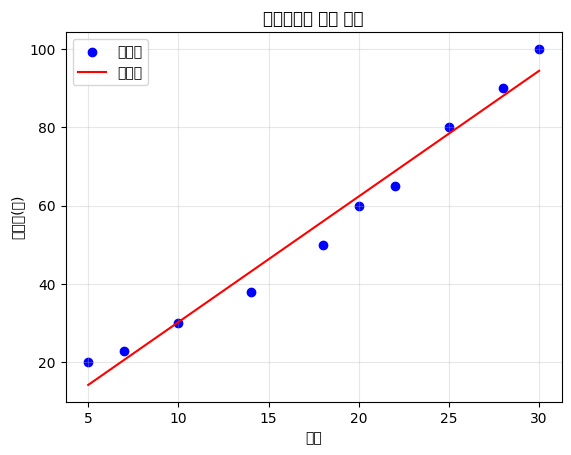

0.9780893943026799
15.741455557182599
3.9675503219471078


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = {
    'temperature' : [5,7,10,14,18,20,22,25,28,30],
    'sales' : [20,23,30,38,50,60,65,80,90,100]
}
df = pd.DataFrame(data)


# 1. X, y 정의
X = df[["temperature"]] #독립변수 x 추출 :(n,1), 2차원형태로 
y = df["sales"] #종속변수 y추출
# x= df.drop("salse", axis=1) #x가 많은 경우에 사용될수 있음

#원래는 데이터 분할을 해야됩니다 train_test_split으로 훈련 셋/테스트 셋으로 분할
# 2. 모델 생성 및 학습
model = LinearRegression() #단순 선형 회귀 모델생성
model.fit(X,y) #모델 훈련 파라미터 값(절편과 기울기를 구할수 있다)
# 3. 회귀 계수/절편 확인
print(f"기울기(coef):{model.coef_[0]:.3f}") #기울기(coefficient)
print(f"절편(intercept):{model.intercept_:.3f}") #절편(intercept)
# 4. 전체 예측
#원래는 여기서 x_test예측해야되는데, 훈련 데이터로 예측 그대로 진행
pred = model.predict(X) #예측 수행

# 5. 새로운 값 예측
new_temperature = np.array([[27]]) #2차원 형태
new_pred = model.predict(new_temperature)
#ne_pred에 예측값이 담겨있다
print(f"온도가 27도일때 예상 판매량:{int(new_pred[0])}개")
# 6. 시각화
#데이터 산점도 x축: 온도, y축: 판매량
plt.scatter(df["temperature"],df["sales"],color="blue",label="실제값") 
#회귀선을 선 그래프로 그리기 x축: 온도, y축: 판매량(예측으로 구한)
plt.plot(df["temperature"],pred,color="red",label="회귀선")
plt.xlabel("기온")
plt.ylabel("판매량(개)")
plt.title("아이스크림 판매 예측")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# 7. 결과 확인
#평가는 실체 y_test와 예측 y_pred랑 비교
print(r2_score(y,pred))
print(mean_squared_error(y, pred)) #mse; 평균 오차 제곱합
print(np.sqrt(mean_squared_error(y,pred))) #RMSE; MSE의 제곱근()


## 단순 선형회귀 - 공부시간과 시험점수

한 학생의 일일 공부시간과 시험점수 간의 관계를 분석하려고 합니다. 공부시간이 시험점수에 어떤 영향을 미치는지 예측 모델을 만들어보세요.
```
공부시간(시간) | 시험점수(점)
1              | 55
2              | 60
3              | 65
4              | 70
5              | 75
6              | 80
7              | 85
8              | 90
```

1. 위 학습 데이터로 모델을 학습시키세요.
2. 공부시간이 9시간일 때 예상 점수를 예측하세요.
3. 산점도와 회귀선(Regression Line)을 그래프로 시각화하세요.
4. 모델의 성능(R Squared Score)을 확인하세요.



기울기(계수): 5.00
절편: 50.00
예측 점수: 95.0
R^2 점수: 1.0000


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANG

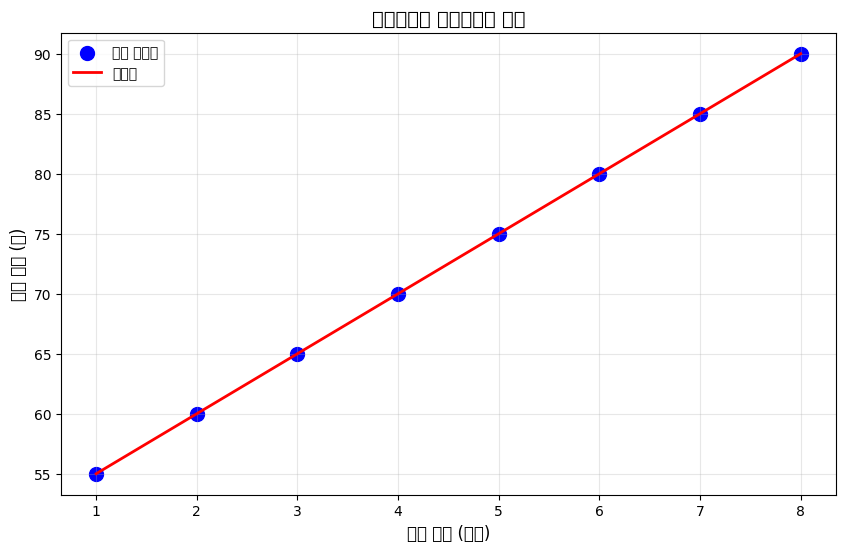

y = 5.00x + 50.00


In [38]:
# 1. 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. 데이터셋 정의
df = pd.DataFrame({
    'study_hours' : [1, 2, 3, 4, 5, 6, 7, 8],
    'test_score' : [55, 60, 65, 70, 75, 80, 85, 90]
})

# 3. 데이터 준비하기 (X, y)
X = df[["study_hours"]] # 독립변수: 2차원 형태로 만드세요.
y = df["test_score"] # 종속변수

# 4. 모델 생성 후, 학습을 진행하세요!
model = LinearRegression()
model.fit(X,y)

# 5. 모델 파라미터 출력하기 (절편, 기울기(계수))
print(f"기울기(계수): {model.coef_[0]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 6. 예측하기
# 예측용 테스트 데이터
new_study_hours = np.array([[9]]) # 2차원 형태
#x_test
# 예측하기
predicted_score = model.predict(new_study_hours)
print(f'예측 점수: {predicted_score[0]}')

# 7. 성능 평가
y_pred = model.predict(X) # 데이터 X에 대해 예측하기

r2 = r2_score(y, y_pred) # R2 score
print(f'R^2 점수: {r2:.4f}')

# 8. 시각화 (산점도와 회귀선에 대한 선 그래프)
plt.figure(figsize=(10, 6))
# 산점도 
plt.scatter(df[["study_hours"]], df['test_score'], color='blue', label='실제 데이터', s=100)

# 구한 회귀선을 선 그래프로
plt.plot(df[["study_hours"]], y_pred, color='red', linewidth=2, label='회귀선')

plt.xlabel('공부 시간 (시간)', fontsize=12)
plt.ylabel('시험 점수 (점)', fontsize=12)
plt.title('공부시간과 시험점수의 관계', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 9. 회귀식 출력 (y = ax + b 형태)
print(f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

## 다중 선형 회귀 - 아파트 가격 예측

아파트의 면적, 방 개수, 건축연수를 바탕으로 가격을 예측하는 모델을 만들어보세요.

```
면적(㎡) | 방개수 | 건축연수(년) | 가격(백만원)
60       | 2      | 5            | 300
75       | 3      | 3            | 400
85       | 3      | 10           | 380
100      | 4      | 2            | 520
110      | 4      | 7            | 480
120      | 4      | 15           | 450
130      | 5      | 5            | 580
140      | 5      | 12           | 550
```

1. 위 데이터로 다중회귀 모델을 학습시키세요
2. 면적 95㎡, 방 3개, 건축연수 8년인 아파트의 가격을 예측하세요
3. 각 특성(면적, 방개수, 건축연수)의 회귀계수를 확인하세요
4. 어떤 특성이 가격에 가장 큰 영향을 미치는지 분석하세요
5. 모델의 성능(R² 점수, MSE)을 평가하세요

 area 계수: -0.81
 rooms 계수: 113.63
 age 계수: -3.36
절편: 139.14
예측 결과:
면적: 95㎡, 방: 3개, 건축연수: 8년
예상 가격: [376.24213836]
모델 성능:
R^2 점수: 0.9944
평균 제곱 오차(MSE): 43.18
평균 제곱근 오차(RMSE): 6.57


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL

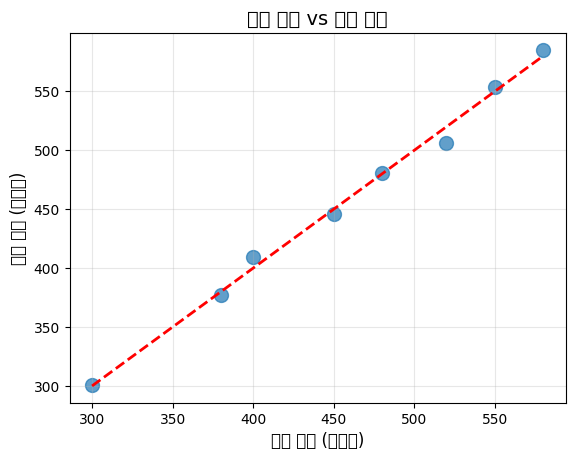

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. 데이터 불러오기
data = {
    "area" : [60, 75, 85, 100, 110, 120, 130, 140],
    "rooms": [2, 3, 3, 4, 4, 4, 5, 5],
    "age": [5, 3, 10, 2, 7, 15, 5, 12],
    "price": [300, 400, 380, 520, 480, 450, 580, 550]
}
df = pd.DataFrame(data)

# 데이터 살펴보기


# 2. 데이터 준비 X, y 데이터 
X = df[["area","rooms","age"]] # 독립변수(면적, 방개수, 건축연수) 3개 컬럼 추출 
y = df["price"] # 종속변수 (가격)

# 3. 모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

# 4. 모델 파라미터(계수, 절편) 확인
for feature, coef in zip(X.columns, model.coef_):
    print(f" {feature} 계수: {coef:.2f}")
print(f"절편: {model.intercept_:.2f}")


# 6. 새로운 데이터 예측
# 원하면 데이터를 추가해보세요!
new_apartment = np.array([[95, 3, 8]])  # 95㎡, 방3개, 8년일 때!?

predicted_price = model.predict(new_apartment)
print(f"예측 결과:")
print(f"면적: 95㎡, 방: 3개, 건축연수: 8년")
print(f"예상 가격: {predicted_price}")

# 7. 모델 성능 평가
y_pred = model.predict(X) # X에 대해 예측을 진행하세요.

r2 = r2_score(y, y_pred) # R^2 Score
mse = mean_squared_error(y, y_pred) # MSE
rmse = np.sqrt(mse) # RMSE

print(f"모델 성능:")
print(f"R^2 점수: {r2:.4f}")
print(f"평균 제곱 오차(MSE): {mse:.2f}")
print(f"평균 제곱근 오차(RMSE): {rmse:.2f}")

# 8. 시각화: 실제값 vs 예측값

# 실제 값과 예측 값에 대한 산점도를 그리세요!
# x축: 실제 값, y축: 예측 값
plt.scatter(y, y_pred, alpha=0.7, s=100)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('실제 가격 (백만원)', fontsize=12)
plt.ylabel('예측 가격 (백만원)', fontsize=12)
plt.title('실제 가격 vs 예측 가격', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

## 집 전기요금 예측
현대 가정에서는 전기사용량이 꾸준히 증가하면서 전기요금 관리가 중요한 이슈가 되고 있습니다.
특히 가전제품 사용량 증가, 계절 변화에 따른 냉·난방 기기 사용, 가구 형태의 다양화 등으로 인해 전기요금의 변동 폭이 커졌습니다.

가정의 전기 사용 패턴을 기반으로 전기요금을 예측하는 회귀 모델을 만들어보는 것이 목표입니다.
전력 사용량(kWh), 집에 있는 가전제품의 수, 평균 기온과 같은 변수들이 전기요금에 어떤 영향을 미치는지 분석하고,이를 통해 새로운 가정의 전기요금을 예측해보게 됩니다.

- usage_kwh: 월 전력 사용량 (kWh)
- appliance_cnt: 가전제품 수
- temperature: 평균기온(°C)
- bill: 월 전기요금(만원)

| usage_kwh | appliance_cnt | temperature | bill |
| --- | --- | --- | --- |
| 250 | 5 | 5 | 4.2 |
| 300 | 6 | 10 | 4.8 |
| 150 | 4 | 15 | 3.1 |
| 400 | 8 | 0 | 6.0 |
| 350 | 7 | 8 | 5.4 |
| 200 | 4 | 12 | 3.5 |
| 100 | 3 | 18 | 2.7 |
| 450 | 9 | -2 | 6.8 |

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

electric_data = {
    "usage_kwh": [250,300,150,400,350,200,100,450],
    "appliance_cnt": [5,6,4,8,7,4,3,9],
    "temperature": [5,10,15,0,8,12,18,-2],
    "bill": [4.2,4.8,3.1,6.0,5.4,3.5,2.7,6.8]
}
df_elec = pd.DataFrame(electric_data)

# 데이터를 X, y로 분리 (누가 독립변수들? 누가 종속변수?)
X = None
y = None

# 모델 생성 및 학습
model = None
model.None(None, None)

# 회귀 계수와 절편 출력하기
print("회귀 계수:", None)
print("절편:", None)

# 새 집 예상 전기요금
new_house = np.array([[320, 6, 9]]) # 예측용 테스트 데이터(필요시 더 추가해보세요!)

pred = None # 예측하기
print("예상 전기요금:", pred[0])

## 의료보험료 예측

의료보험 시스템에서는 각 개인의 건강 상태, 생활 습관, 인구통계학적 요인에 따라 산출되는 보험료가 매우 다양합니다.
예를 들어 나이, BMI(체질량 지수), 흡연 여부, 자녀 수, 거주 지역 등은 보험료에 큰 영향을 미치는 요소로 잘 알려져 있습니다.

Medical Cost Personal Dataset(insurance.csv) 를 활용하여
개인의 특성 정보를 기반으로 의료보험료를 예측하는 회귀 모델을 직접 구축해봅시다.

`None으로 되어있는 부분을 직접 채워봅시다!`

0. 데이터셋을 읽고 간단한 탐색(EDA)을 진행합니다. 
  - 구조 파악
  - 결측치 탐색 후, 만약에 있다면 처리하기

1. X 데이터(독립 변수)와 y 데이터(종속 변수)를 분리합니다.
2. 범주형 변수에 대해 모델 학습을 위해 OneHotEncoder로 인코딩을 진행합니다.
  - 'sex', 'smoker', 'region'
3. 수치형 변수에 대해 모델 학습을 위해 StandardScaler로 스케일링을 진행합니다.
  - 'age', 'bmi', 'children'
4. 2,3번이 진행된 결과에 train_test_split으로 훈련 데이터와 테스트 데이터를 분리합니다. (8:2 비율로)
5. LinearRegression 모델을 생성 후, 학습합니다. 
6. 테스트 데이터에 대해 학습된 모델에 예측을 진행합니다. 
  - 예측 후, y_test와 y_predicted를 데이터프레임 형태로 출력합니다.
7. 최종적으로 mean_squared_error와 r2_score로 모델의 성능을 출력합니다. 


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 로드
df = pd.read_csv("insurance.csv")

# 0. 간단한 EDA (구조 파악 및 결측치 탐색)
print(df)

# 1. X, y 분리 (drop을 활용하세요!)
X = df.drop("charges", axis=1)
y = df["charges"]

# 스케일링할 컬럼 이름 목록을 리스트를 정의하세요
num_cols = ['sex', 'smoker', 'region']
# 인코딩할 컬럼 이름 목록을 리스트로 정의하세요
cat_cols = ['age', 'bmi', 'children']

# 2. 원핫 인코딩
# 인코더 생성하기
ohe = None
# 인코딩할 컬럼만 따로 추출하세요
X_categories = None 
# 원핫 인코딩 수행하기
# X_cat_encoded = ohe.None(X_categories)

# 3. 스케일링(Z-Score)
# 스케일러 생성하기
scaler = None
# 스케일링할 컬럼만 따로 추출하세요
X_nums = None 
# 스케일링 수행하기
# X_num_scaled = scaler.None(X_nums)

# [수정 금지] 인코딩한 결과와 스케일링한 결과 합치기
# X_final: 스케일링/인코딩을 수행한 최종 결과 데이터
X_final = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

# 4. 훈련, 테스트 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = None(None, None, test_size=None, random_state=42)

# 5. 회귀 모델 생성 후, 훈련
model = None
None

# 6. 예측 진행
pred = None

# 실제 값과 예측 값 비교하는 데이터프레임 생성
result = pd.DataFrame({
    'y_actual' : None,
    'y_predicted' : None
})
print(result)

# 7. 평가 진행 및 결과 출력
# -실제 값과 예측 값과의 오차에 대한 평가
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse) # RMSE
print(r2_score(y_test, pred)) # R2 Score

<>:44: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:44: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?


FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'